In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.columns  = ["age", "annual_income", "home_ownership", "employment_length_year", "loan_intent", "loan_grade", "loan_amount", "interest_rate", "loan_status","percent_income", "historical_default","credit_history_length"] 

In [5]:
df.head()

,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df.shape

(32581, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32581 non-null  int64  
 1   annual_income           32581 non-null  int64  
 2   home_ownership          32581 non-null  object 
 3   employment_length_year  31686 non-null  float64
 4   loan_intent             32581 non-null  object 
 5   loan_grade              32581 non-null  object 
 6   loan_amount             32581 non-null  int64  
 7   interest_rate           29465 non-null  float64
 8   loan_status             32581 non-null  int64  
 9   percent_income          32581 non-null  float64
 10  historical_default      32581 non-null  object 
 11  credit_history_length   32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.isna().sum()

age                          0
annual_income                0
home_ownership               0
employment_length_year     895
loan_intent                  0
loan_grade                   0
loan_amount                  0
interest_rate             3116
loan_status                  0
percent_income               0
historical_default           0
credit_history_length        0
dtype: int64

In [9]:
df.loc[df["employment_length_year"].isna()]

,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [10]:
df["employment_length_year"].value_counts()

employment_length_year
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

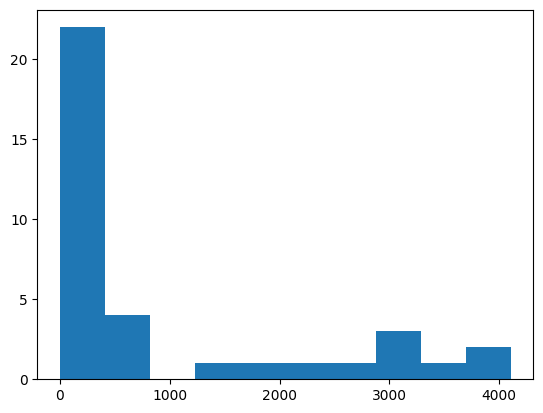

In [11]:
plt.hist(df["employment_length_year"].value_counts())
plt.show()

In [12]:
list(df['interest_rate'])

[16.02,
 11.14,
 12.87,
 15.23,
 14.27,
 7.14,
 12.42,
 11.11,
 8.9,
 14.74,
 10.37,
 8.63,
 7.9,
 18.39,
 7.9,
 10.65,
 7.9,
 20.25,
 18.25,
 10.99,
 7.49,
 16.77,
 17.58,
 7.29,
 14.54,
 12.68,
 17.74,
 9.32,
 9.99,
 12.84,
 11.12,
 6.62,
 14.17,
 13.85,
 13.49,
 7.51,
 18.39,
 14.54,
 16.89,
 nan,
 17.99,
 12.69,
 7.88,
 19.41,
 10.38,
 15.33,
 16.45,
 7.49,
 12.69,
 6.62,
 nan,
 18.62,
 15.23,
 10.65,
 7.9,
 15.96,
 11.48,
 nan,
 7.29,
 nan,
 5.99,
 11.58,
 nan,
 15.7,
 15.99,
 14.84,
 10.99,
 14.42,
 6.99,
 13.49,
 nan,
 nan,
 13.61,
 7.9,
 7.49,
 7.51,
 9.91,
 13.48,
 7.14,
 15.99,
 12.98,
 13.57,
 12.69,
 8.9,
 nan,
 nan,
 11.11,
 nan,
 15.68,
 13.06,
 nan,
 15.62,
 13.49,
 nan,
 11.71,
 12.69,
 13.57,
 10.99,
 14.27,
 8.88,
 12.18,
 14.42,
 14.17,
 13.99,
 10.99,
 5.42,
 13.61,
 12.73,
 nan,
 12.87,
 9.91,
 11.49,
 19.91,
 10.65,
 nan,
 11.83,
 13.49,
 14.59,
 9.64,
 14.59,
 nan,
 16.35,
 10.99,
 18.67,
 9.32,
 8.63,
 10.08,
 11.83,
 7.9,
 5.99,
 15.33,
 11.83,
 10.36,
 12.23,


In [13]:
df['home_ownership'].value_counts()

home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

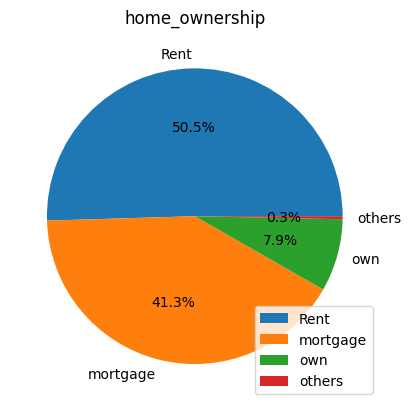

In [14]:
fig, ax = plt.subplots()
ax.pie(df['home_ownership'].value_counts(),autopct='%1.1f%%',labels = ['Rent', 'mortgage', 'own',"others"])
ax.legend()
plt.title("home_ownership")
plt.show()


In [15]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

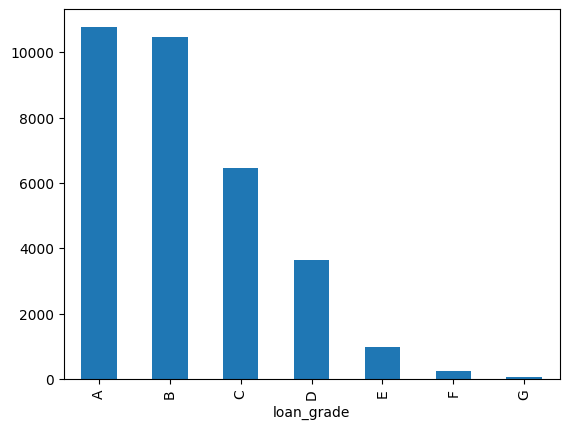

In [16]:
df['loan_grade'].value_counts().plot.bar()
plt.show()

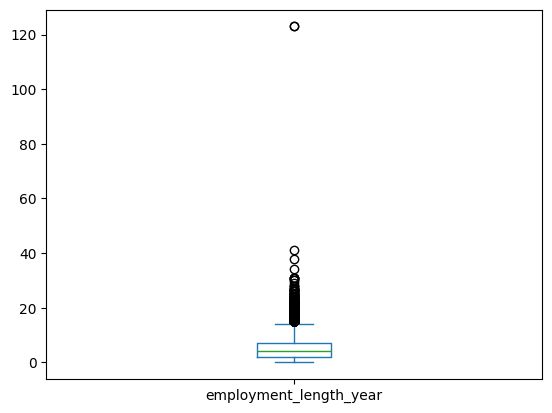

In [17]:
df["employment_length_year"].plot.box()
plt.show()

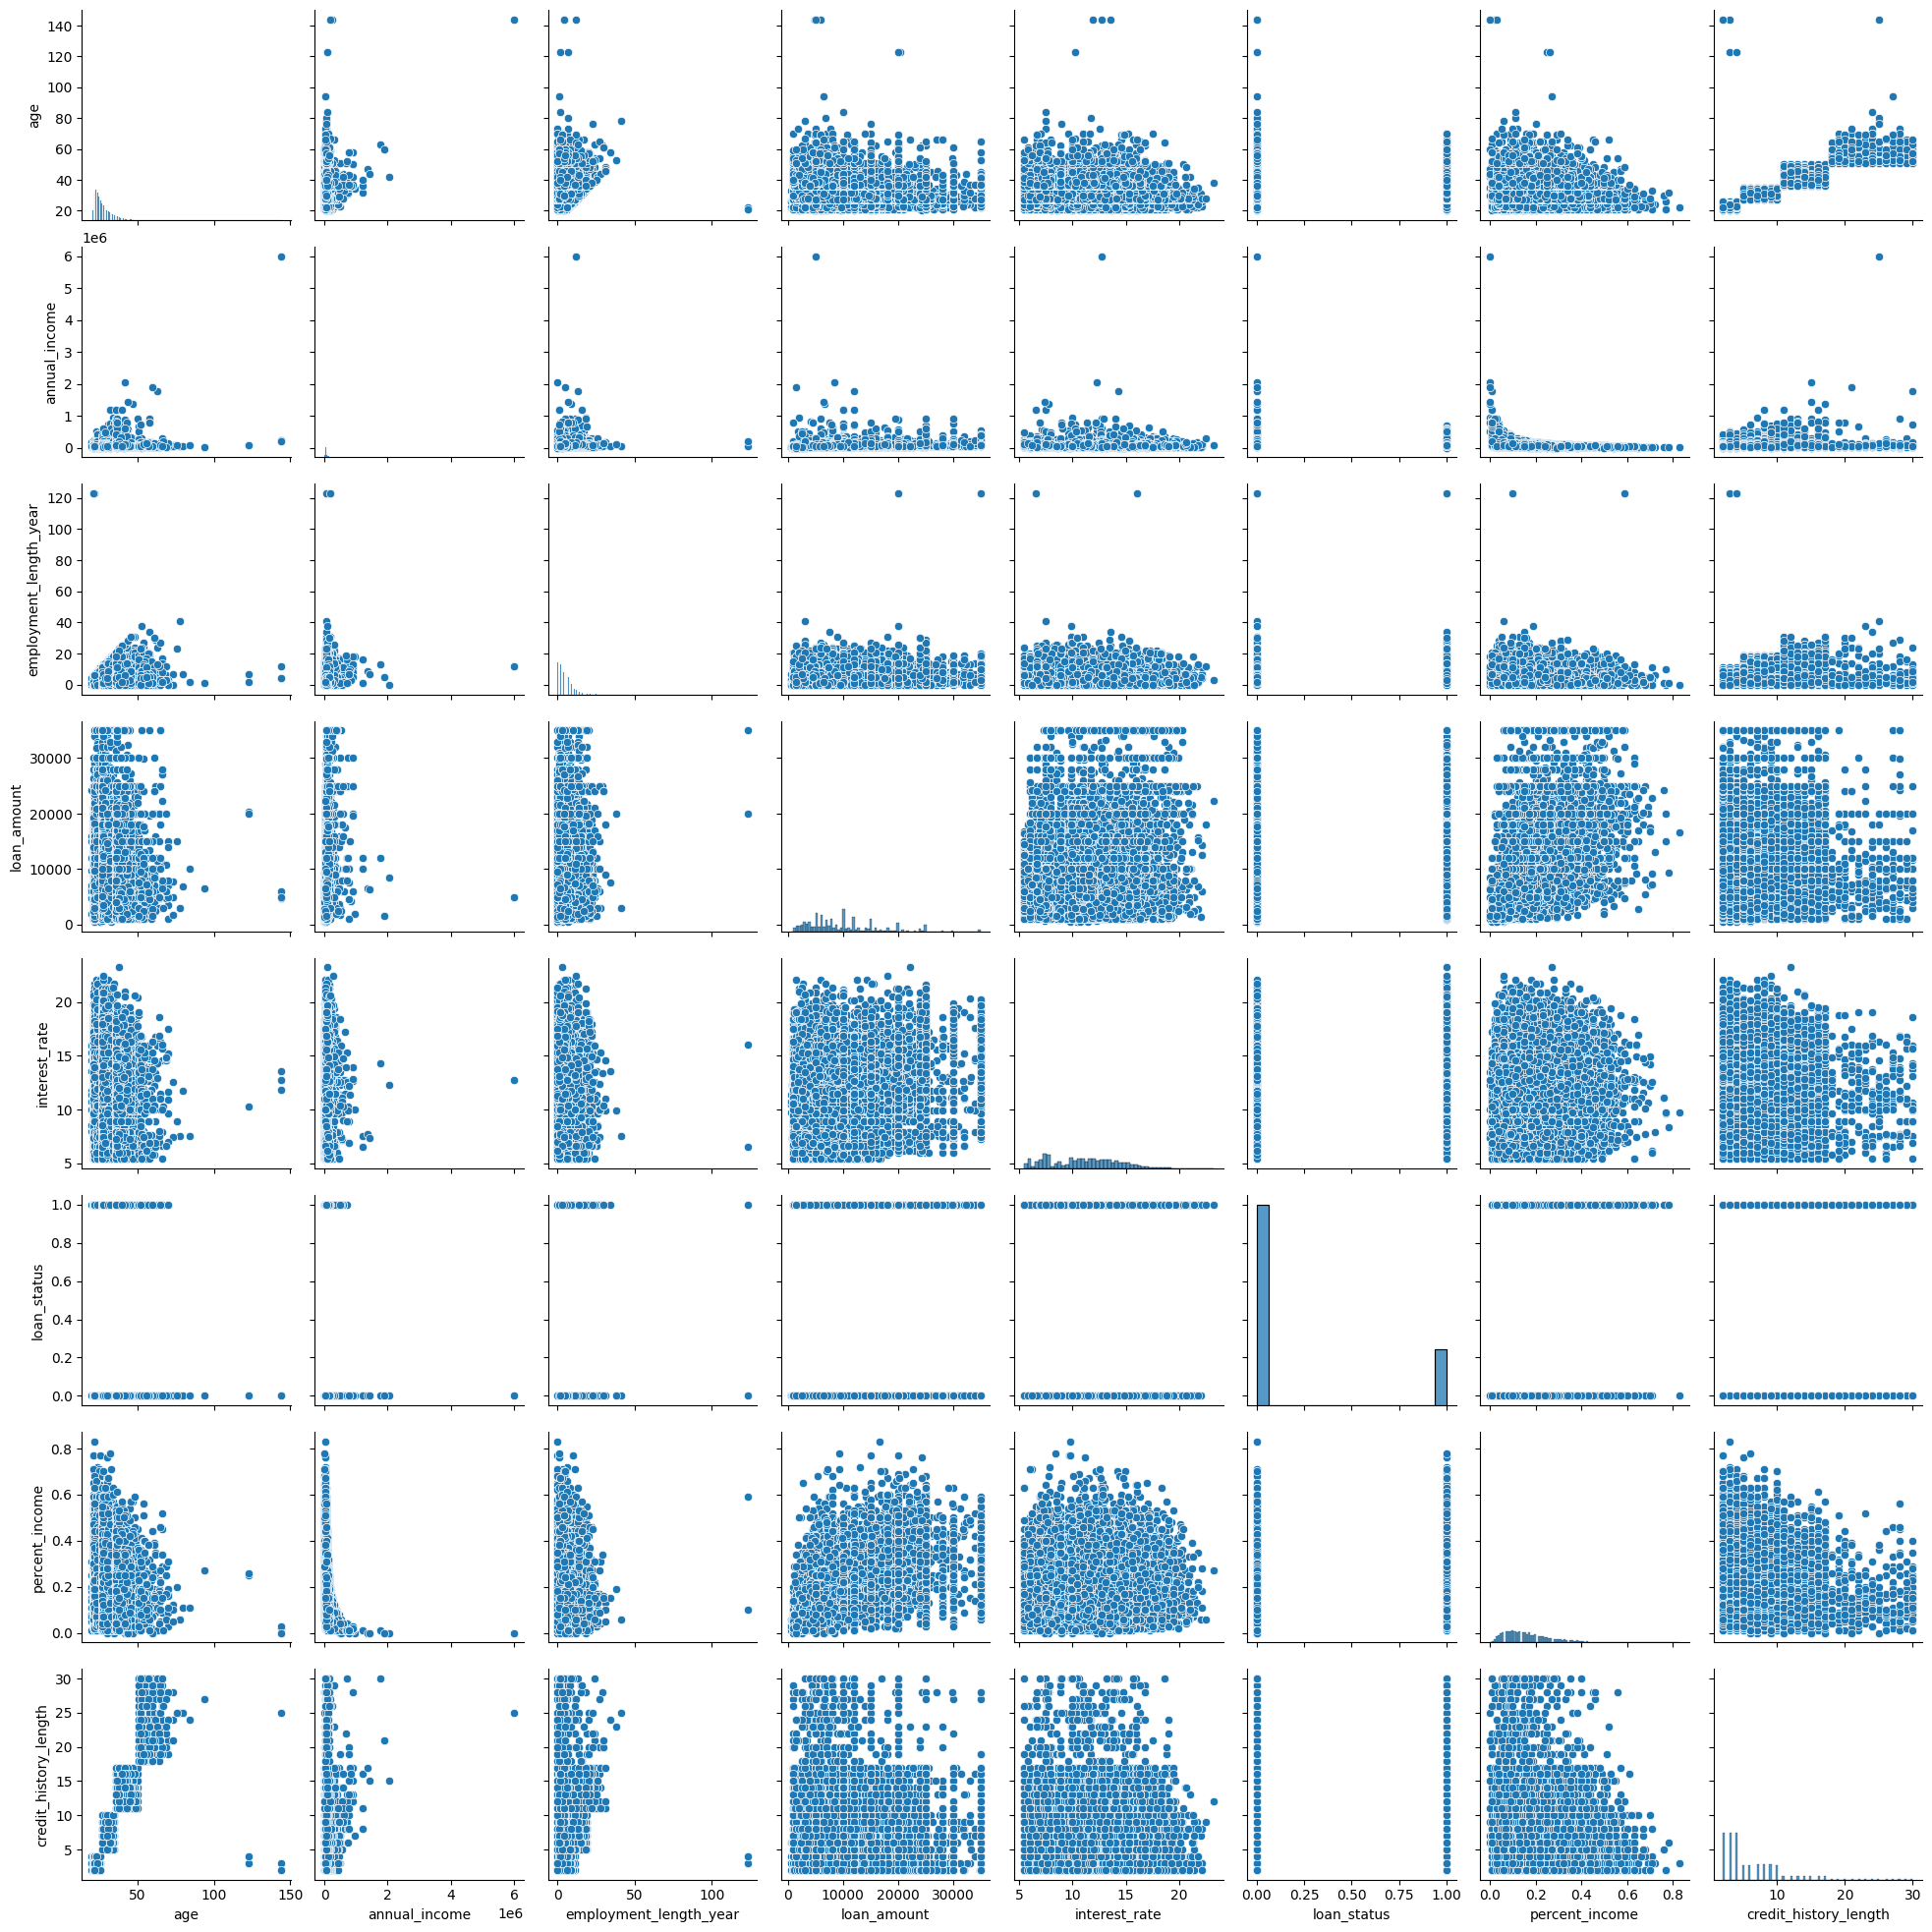

In [18]:
sns.pairplot(df)

In [19]:
df[df["loan_intent"]== "EDUCATION"]

,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
13,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,1,0.32,N,4
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,129000,MORTGAGE,6.0,EDUCATION,B,9000,11.49,1,0.07,N,18
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32561,54,129000,MORTGAGE,6.0,EDUCATION,B,9000,11.49,1,0.07,N,24
32563,52,71520,RENT,0.0,EDUCATION,E,7000,16.82,1,0.10,Y,24


In [20]:
educ1 = df[df["loan_intent"]== "EDUCATION"]

In [21]:
educ1["employment_length_year"].isna().value_counts()

employment_length_year
False    6290
True      163
Name: count, dtype: int64

In [22]:
educ1["employment_length_year"].ffill(inplace =False)

1        5.0
6        8.0
13       4.0
14       2.0
16       0.0
        ... 
32533    6.0
32552    2.0
32561    6.0
32563    0.0
32575    0.0
Name: employment_length_year, Length: 6453, dtype: float64

In [23]:
educ1["employment_length_year"].isna().value_counts()

employment_length_year
False    6290
True      163
Name: count, dtype: int64

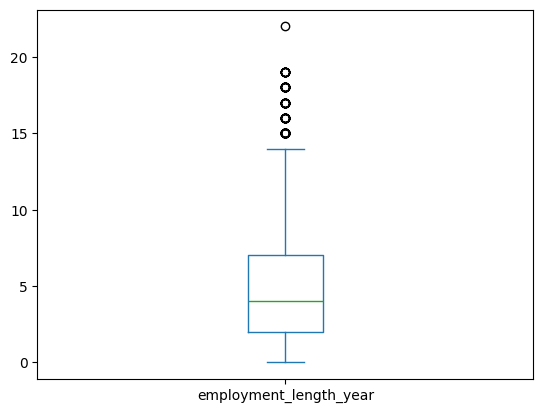

In [24]:
educ1["employment_length_year"].plot.box()
plt.show()

<Axes: >

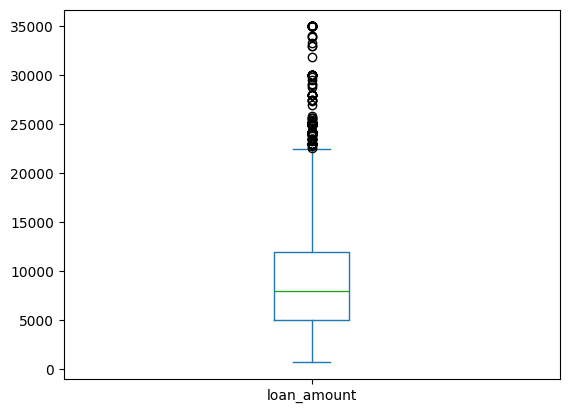

In [25]:
fig, ax = plt.subplots()
df[df["loan_intent"]== "EDUCATION"]["loan_amount"].plot.box()

In [26]:
df[df["loan_intent"]== "EDUCATION"]["home_ownership"].value_counts()

home_ownership
RENT        3281
MORTGAGE    2627
OWN          528
OTHER         17
Name: count, dtype: int64

In [27]:
df[df["loan_intent"]== "EDUCATION"]["loan_amount"].mean()

9482.678599101193

In [28]:
list(df[df["loan_intent"]== "EDUCATION"]["loan_amount"])

[1000,
 35000,
 35000,
 35000,
 35000,
 1750,
 34000,
 4000,
 2500,
 30000,
 24250,
 25000,
 30000,
 10000,
 29100,
 1500,
 9600,
 3000,
 28000,
 6100,
 18000,
 28000,
 28000,
 27500,
 25600,
 25300,
 25000,
 35000,
 25000,
 4750,
 25000,
 25000,
 3000,
 25000,
 25000,
 25000,
 20000,
 12000,
 25000,
 1400,
 25000,
 25000,
 25000,
 22000,
 16000,
 25000,
 28000,
 15000,
 10000,
 25000,
 25000,
 6000,
 18000,
 25000,
 12000,
 25000,
 25000,
 5375,
 25000,
 25000,
 35000,
 25000,
 25000,
 2500,
 1000,
 25000,
 18000,
 21000,
 18000,
 7200,
 1500,
 20000,
 25000,
 25000,
 25000,
 20000,
 20000,
 25000,
 25000,
 25000,
 9600,
 20000,
 2000,
 24250,
 9000,
 25000,
 24250,
 24250,
 24000,
 2250,
 24000,
 4975,
 24000,
 24000,
 24000,
 4000,
 24000,
 5000,
 24000,
 24000,
 24000,
 24000,
 23000,
 23000,
 23000,
 22500,
 22000,
 3000,
 22000,
 22000,
 22000,
 22000,
 3000,
 21500,
 21450,
 9250,
 21250,
 21000,
 21000,
 21000,
 21000,
 21000,
 21000,
 15000,
 20500,
 2100,
 20400,
 20050,
 200

In [29]:
df[df["loan_intent"]== "EDUCATION"]["employment_length_year"].mode()

0    0.0
Name: employment_length_year, dtype: float64

In [30]:
df[df["loan_intent"]== "EDUCATION"][["employment_length_year","home_ownership"]].value_counts()

employment_length_year  home_ownership
0.0                     RENT              530
2.0                     RENT              473
3.0                     RENT              403
1.0                     RENT              394
4.0                     RENT              346
                                         ... 
                        OTHER               1
3.0                     OTHER               1
10.0                    OTHER               1
7.0                     OTHER               1
22.0                    RENT                1
Name: count, Length: 70, dtype: int64

In [31]:
df["employment_length_year"].isna().value_counts()

employment_length_year
False    31686
True       895
Name: count, dtype: int64

In [32]:
df.isna().sum()

age                          0
annual_income                0
home_ownership               0
employment_length_year     895
loan_intent                  0
loan_grade                   0
loan_amount                  0
interest_rate             3116
loan_status                  0
percent_income               0
historical_default           0
credit_history_length        0
dtype: int64

## Personal

In [33]:
per = df[df["loan_intent"]== "PERSONAL"]

In [34]:
per["employment_length_year"].isna().value_counts()

employment_length_year
False    5369
True      152
Name: count, dtype: int64

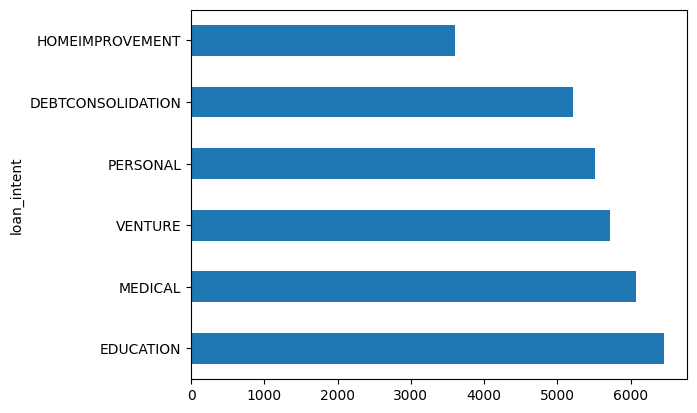

In [35]:
df["loan_intent"].value_counts().plot.barh()
plt.show()

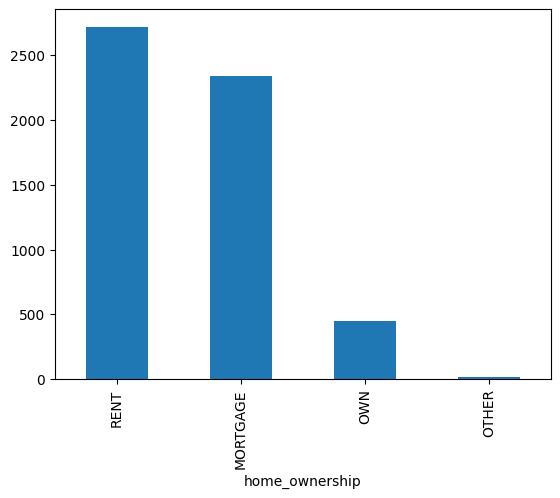

In [36]:
df[df["loan_intent"]== "PERSONAL"]["home_ownership"].value_counts().plot.bar()
plt.show()

## Medical

In [37]:
medi1 = df["loan_intent"]== "MEDICAL"

In [38]:
medi1.isna().value_counts()

loan_intent
False    32581
Name: count, dtype: int64

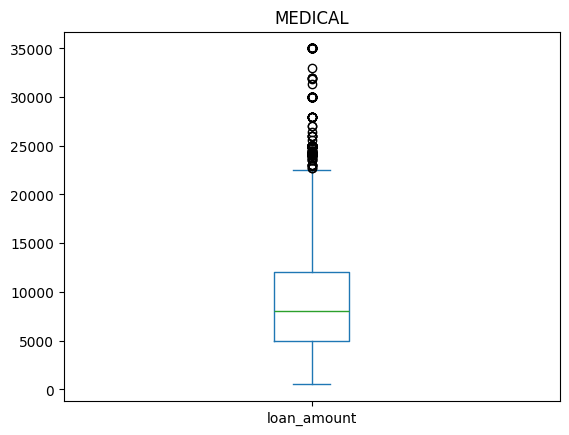

In [39]:
fig, ax= plt.subplots()
df[df["loan_intent"]== "MEDICAL"]["loan_amount"].plot.box()
plt.title("MEDICAL")
plt.show()

In [40]:
list(df[df["loan_intent"]== "MEDICAL"]["loan_amount"].value_counts())

[471,
 419,
 329,
 322,
 263,
 262,
 214,
 200,
 191,
 156,
 131,
 126,
 116,
 91,
 79,
 78,
 76,
 73,
 68,
 67,
 65,
 63,
 63,
 57,
 57,
 56,
 54,
 53,
 52,
 46,
 46,
 44,
 43,
 42,
 42,
 38,
 33,
 33,
 31,
 31,
 30,
 29,
 26,
 26,
 26,
 23,
 22,
 22,
 21,
 21,
 19,
 19,
 19,
 18,
 17,
 16,
 16,
 16,
 15,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,

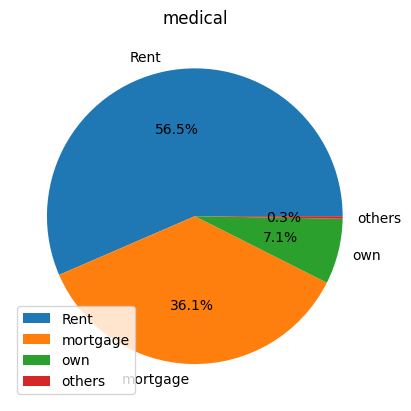

In [41]:
fig, ax = plt.subplots()
ax.pie(df[df["loan_intent"]== "MEDICAL"]["home_ownership"].value_counts(),autopct = "%1.1f%%",labels = ['Rent', 'mortgage', 'own',"others"])
ax.legend()
plt.title("medical")
plt.show()

In [42]:
df.loan_intent.value_counts().mean()

5430.166666666667

In [43]:
df[df["loan_amount"] > 9589.371106]

,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


In [44]:
df.describe()

,age,annual_income,employment_length_year,loan_amount,interest_rate,loan_status,percent_income,credit_history_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [45]:
df[df["loan_intent"]== "EDUCATION"]["home_ownership"].value_counts()

home_ownership
RENT        3281
MORTGAGE    2627
OWN          528
OTHER         17
Name: count, dtype: int64

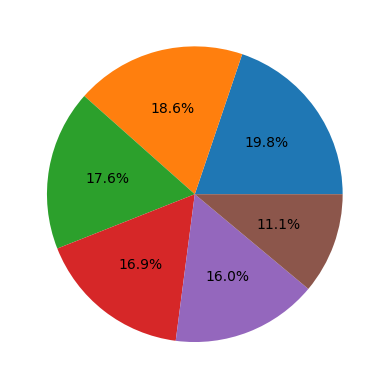

In [46]:
fig, ax = plt.subplots()
ax.pie(df["loan_intent"].value_counts(),autopct = '%1.1f%%'  )
plt.show()

In [47]:
ven1 =df[df["loan_intent"]=="VENTURE"]

In [48]:
ven1["employment_length_year"].isna().value_counts()

employment_length_year
False    5556
True      163
Name: count, dtype: int64

In [49]:
debt1 = df[df["loan_intent"]=="DEBTCONSOLIDATION"]

In [50]:
debt1["employment_length_year"].isna().value_counts()

employment_length_year
False    5064
True      148
Name: count, dtype: int64

In [51]:
hom1 = df[df["loan_intent"]=="HOMEIMPROVEMENT"]

In [52]:
hom1["employment_length_year"].isna().value_counts()

employment_length_year
False    3510
True       95
Name: count, dtype: int64

In [53]:
df["employment_length_year"].ffill(inplace = True)

In [54]:
df["employment_length_year"].isna().value_counts()

employment_length_year
False    32581
Name: count, dtype: int64

In [55]:
df.loc[df["interest_rate"].isna()]

,age,annual_income,home_ownership,employment_length_year,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,percent_income,historical_default,credit_history_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [56]:
df[["annual_income", "loan_amount", "interest_rate", "percent_income", 	"historical_default"]]

,annual_income,loan_amount,interest_rate,percent_income,historical_default
0,59000,35000,16.02,0.59,Y
1,9600,1000,11.14,0.10,N
2,9600,5500,12.87,0.57,N
3,65500,35000,15.23,0.53,N
4,54400,35000,14.27,0.55,Y
...,...,...,...,...,...
32576,53000,5800,13.16,0.11,N
32577,120000,17625,7.49,0.15,N
32578,76000,35000,10.99,0.46,N
32579,150000,15000,11.48,0.10,N


In [57]:
list(df[df["percent_income"] >= 0.40]["historical_default"].value_counts())

[1078, 257]

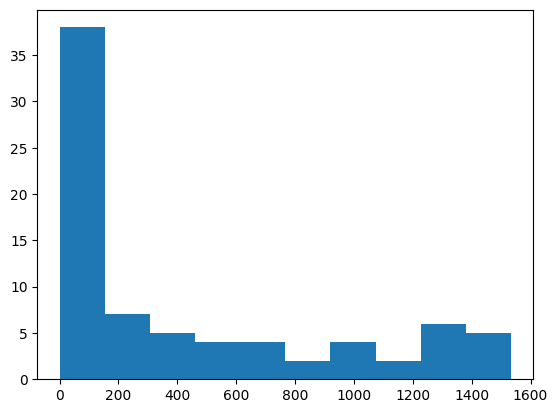

In [59]:
plt.hist(df["percent_income"].value_counts())
plt.show()

In [60]:
df["annual_income"].value_counts()

annual_income
60000    1046
30000     847
50000     778
40000     658
45000     590
         ... 
54316       1
54480       1
72645       1
72893       1
4888        1
Name: count, Length: 4295, dtype: int64

In [61]:
df["annual_income"] > 60000

0        False
1        False
2        False
3         True
4        False
         ...  
32576    False
32577     True
32578     True
32579     True
32580    False
Name: annual_income, Length: 32581, dtype: bool

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32581 non-null  int64  
 1   annual_income           32581 non-null  int64  
 2   home_ownership          32581 non-null  object 
 3   employment_length_year  32581 non-null  float64
 4   loan_intent             32581 non-null  object 
 5   loan_grade              32581 non-null  object 
 6   loan_amount             32581 non-null  int64  
 7   interest_rate           29465 non-null  float64
 8   loan_status             32581 non-null  int64  
 9   percent_income          32581 non-null  float64
 10  historical_default      32581 non-null  object 
 11  credit_history_length   32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [64]:
df.isna().any(axis=0)

age                       False
annual_income             False
home_ownership            False
employment_length_year    False
loan_intent               False
loan_grade                False
loan_amount               False
interest_rate              True
loan_status               False
percent_income            False
historical_default        False
credit_history_length     False
dtype: bool

In [65]:
df.isna().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

In [66]:
df['interest_rate'].fillna(df['interest_rate'].mean(), inplace=True)

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32581 non-null  int64  
 1   annual_income           32581 non-null  int64  
 2   home_ownership          32581 non-null  object 
 3   employment_length_year  32581 non-null  float64
 4   loan_intent             32581 non-null  object 
 5   loan_grade              32581 non-null  object 
 6   loan_amount             32581 non-null  int64  
 7   interest_rate           32581 non-null  float64
 8   loan_status             32581 non-null  int64  
 9   percent_income          32581 non-null  float64
 10  historical_default      32581 non-null  object 
 11  credit_history_length   32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


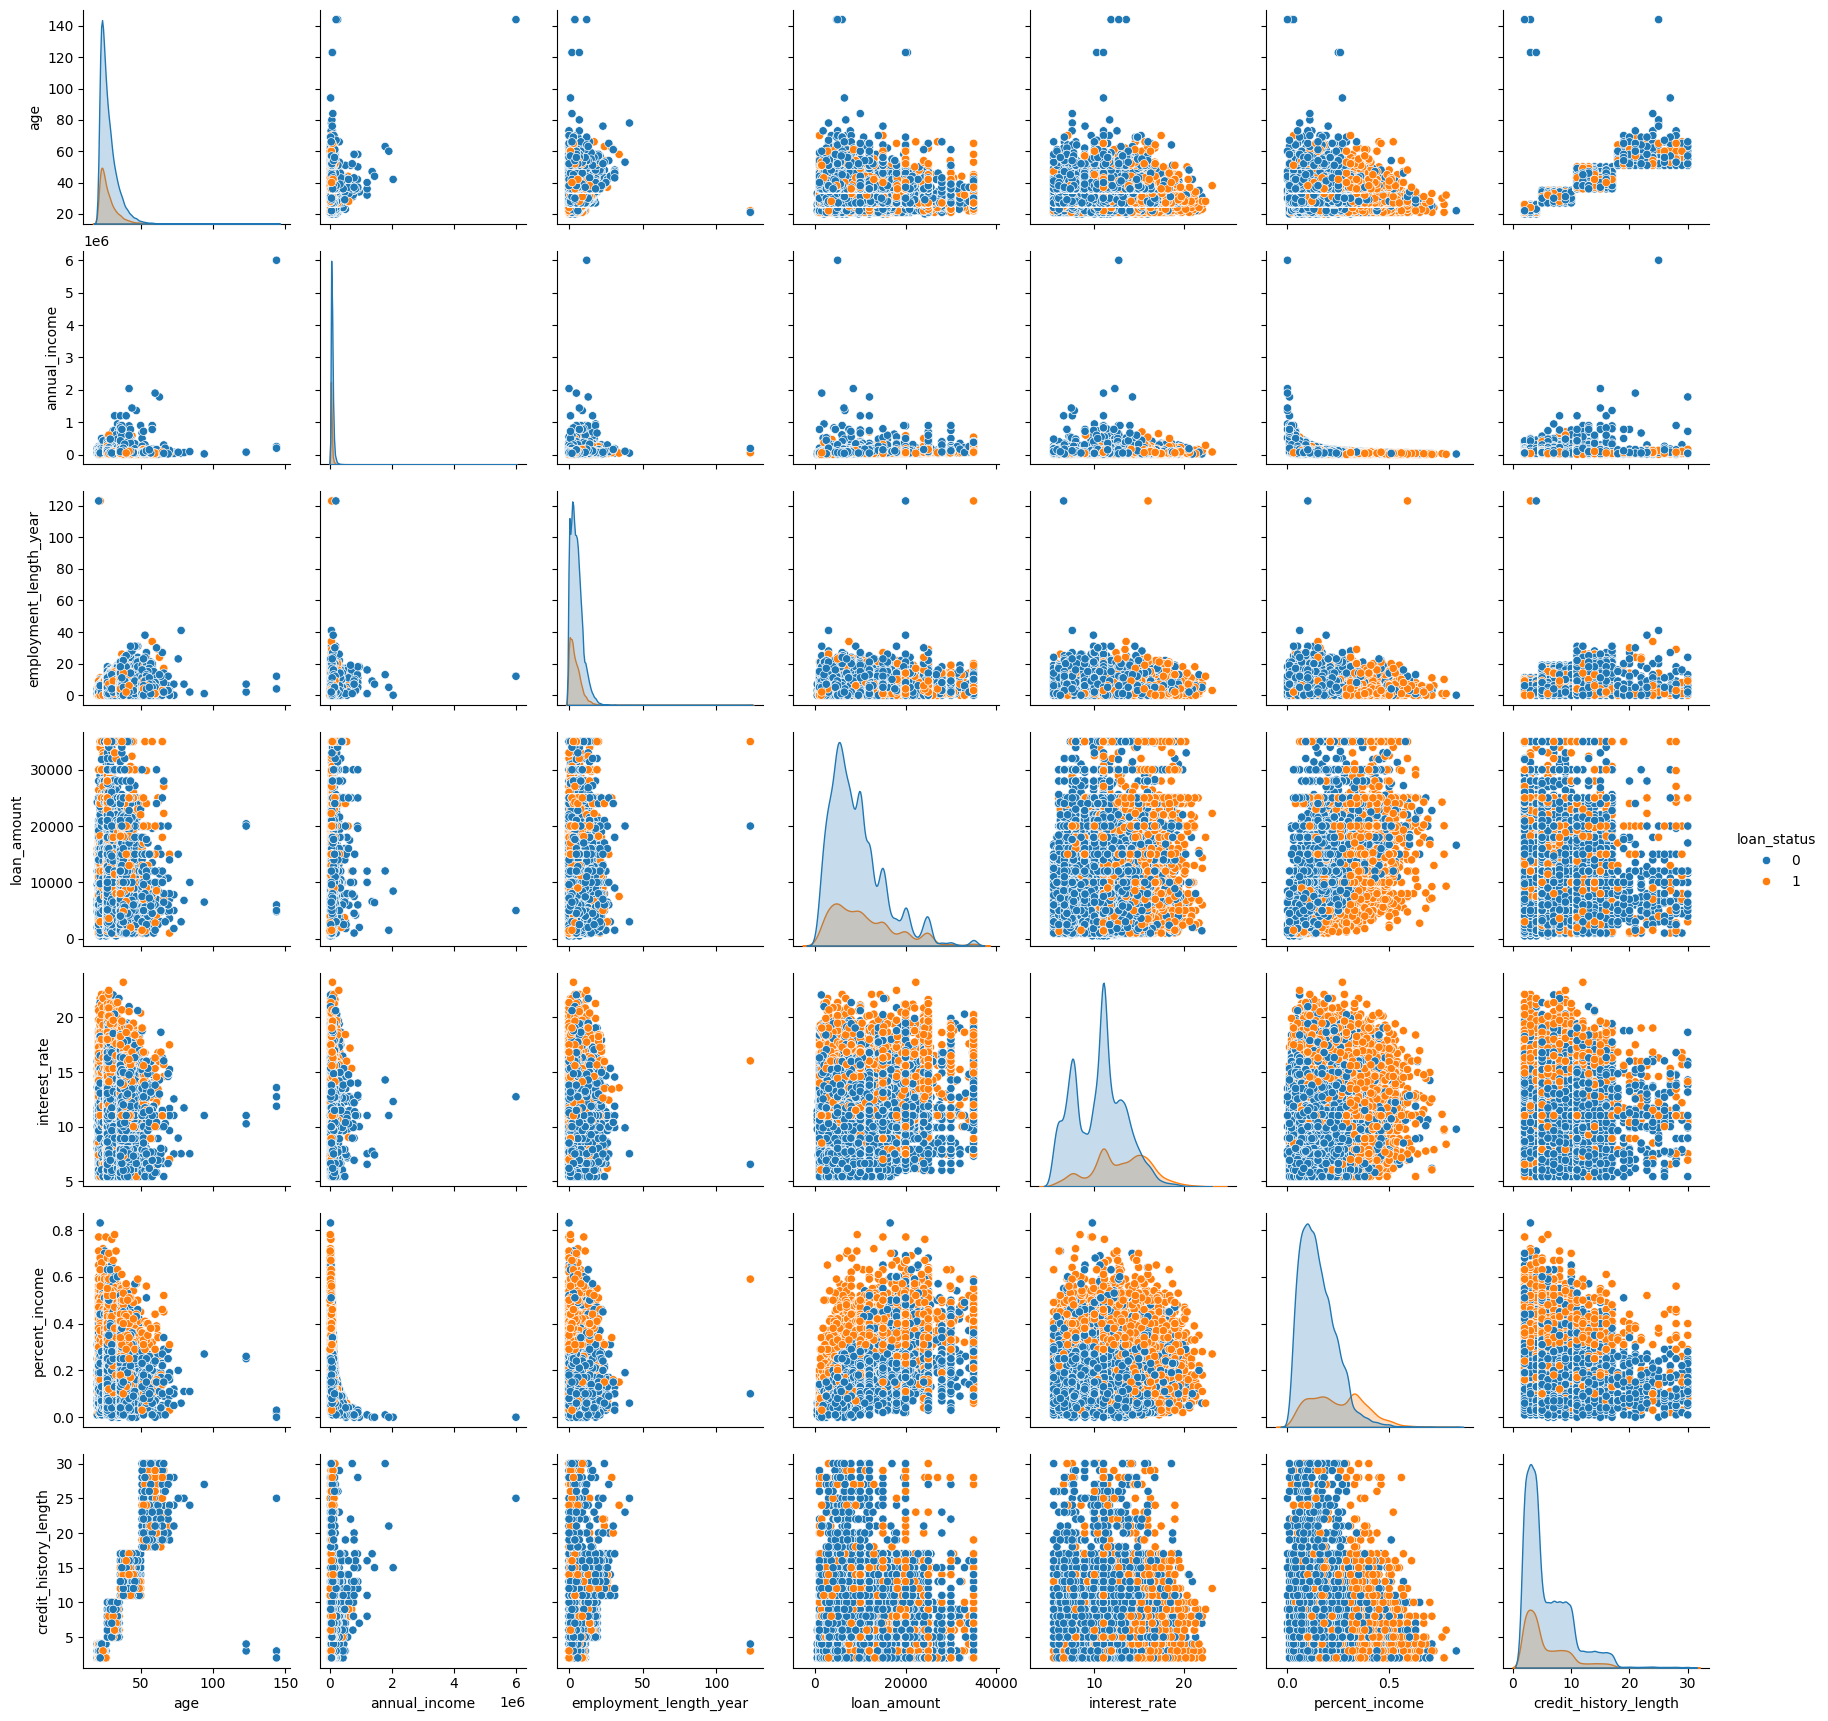

In [69]:
sns.pairplot(df, hue="loan_status")

In [70]:
df.to_csv("loan_data.csv")